## Import Package

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

## Load Data

In [6]:
stock1 = pd.read_csv("../../Data/GM.csv")["Close"].values[-2400:-1]

In [7]:
stock2 = pd.read_csv("../../Data/F.csv")["Close"].values[-2400:-1]

In [8]:
spread = stock1 / stock2

## Nomalize

In [9]:
train = pd.DataFrame(spread)

In [16]:
ratios_mavg5 = train.rolling(window=5, center=False).mean()
ratios_mavg60 = train.rolling(window=60, center=False).mean()
std_60 = train.rolling(window=60, center=False).std()

zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
zscore_60_5 = zscore_60_5[59:].values

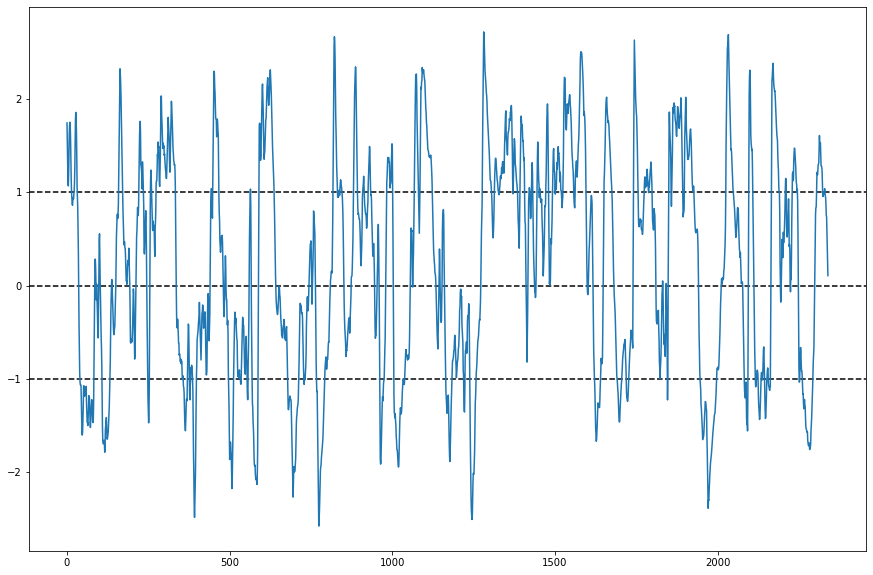

In [26]:
plt.figure(figsize=(15, 10))
plt.axhline(y=0, linestyle="dashed", color="black")
plt.axhline(y=1, linestyle="dashed", color="black")
plt.axhline(y=-1, linestyle="dashed", color="black")
plt.plot(list(range(len(zscore_60_5))), zscore_60_5)

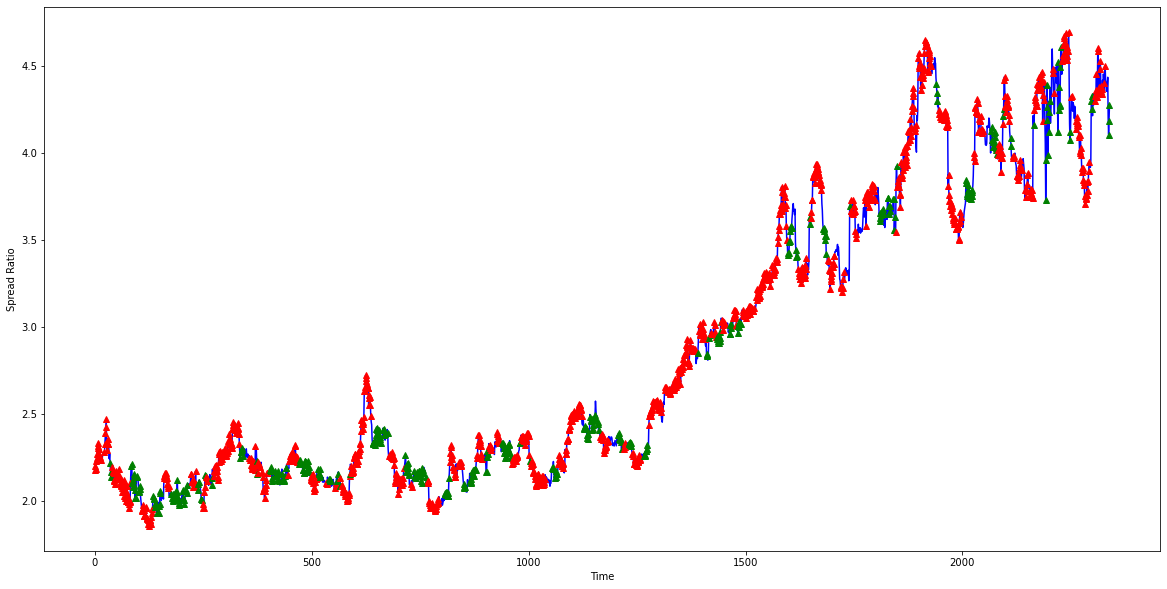

In [48]:
plt.figure(figsize=(20, 10))
plt.plot(spread[59:], color="blue")
for i, value in enumerate(spread[59:]):
    if zscore_60_5[i] >= 1 or zscore_60_5[i] <= -1:
        plt.plot(i, value, color="red", marker="^")
    elif abs(zscore_60_5[i]-0) <= 0.45:
        plt.plot(i, value, color="green", marker="^")

plt.xlabel("Time")
plt.ylabel("Spread Ratio")
plt.show()

No handles with labels found to put in legend.


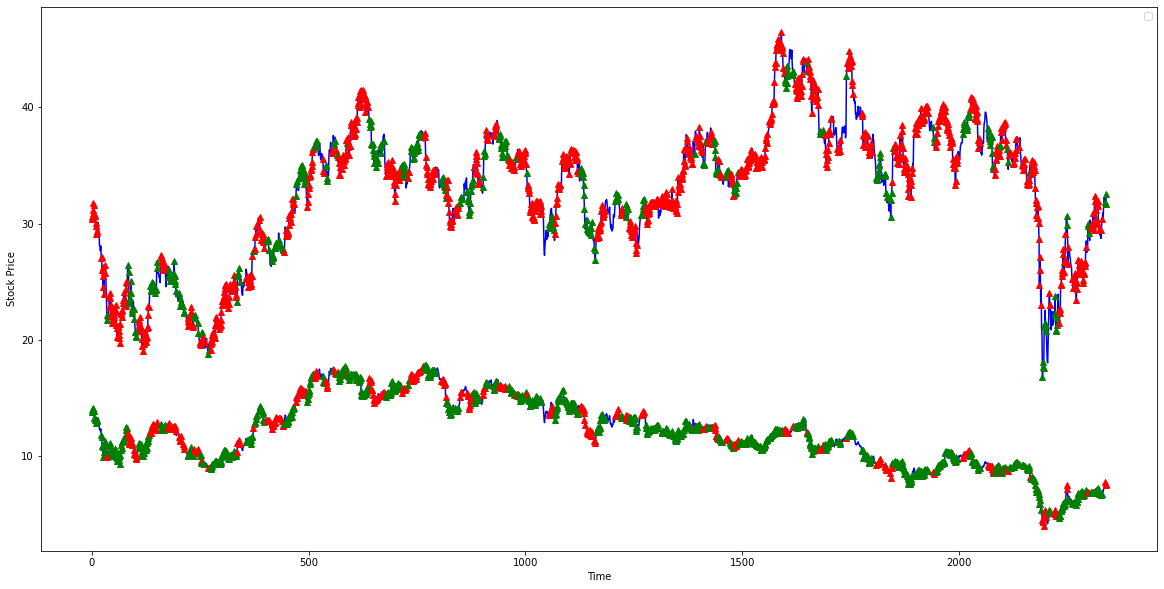

In [49]:
plt.figure(figsize=(20, 10))
plt.plot(stock1[59:], color="blue")
plt.plot(stock2[59:], color="blue")

for i, value in enumerate(zscore_60_5):
    if value >= 1 or value <= -1:
        plt.plot(i, stock2[59+i], color="green", marker="^")
        plt.plot(i, stock1[59+i], color="red", marker="^")
    elif abs(value - 0)<=0.45:
        plt.plot(i, stock2[59+i], color="red", marker="^")
        plt.plot(i, stock1[59+i], color="green", marker="^")
        

plt.legend()
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.show()

In [51]:
len(stock1[59+20:59+20+2300])

2300